<a href="https://colab.research.google.com/github/bugeki/ML/blob/main/military_power_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML/Ass 4/World military power.xlsx",header=[0,1])
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                    30.0  ...      Afghanistan   
1                                     0.0  ...          Albania   
2                                    59.0  ...          Algeria   
3                                    30.0  ...           Angola   
4                                     9.0  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                      28748.0   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                            0.0   
1                  Albania                          362.0   
2                  Algeria                          998.0   
3                   Angola                         1600.0   
4                Argentina                         4989.0   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                        1200.0           Afghanistan   
1                 Albania                          41.0               Albania   
2                 Algeria                           0.0               Algeria   
3                  Angola                        1300.0                Angola   
4               Argentina                       11000.0             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


# Ingest Data  

In [ ]:
df.describe()

2020 ranking       Airforce Strength  \
      Military Strength Power Index Aircraft Strength value   
count                    138.000000              138.000000   
mean                       1.460716              388.471014   
std                        1.324018             1231.981859   
min                        0.060600                0.000000   
25%                        0.574800               33.000000   
50%                        1.034100              111.000000   
75%                        2.021525              290.250000   
max                       10.168100            13264.000000   

                                                                         \
      Fighter/Interceptor Strength value Attack Aircraft Strength value   
count                         138.000000                     138.000000   
mean                           81.565217                      25.760870   
std                           230.324777                      94.528222   
min                             0.000000                       0.000000   
25%                             0.000000                       0.000000   
50%                            17.000000                       0.000000   
75%                            60.500000                      15.750000   
max                          2085.000000                     742.000000   

                                                                            \
      Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value   
count                              138.000000                   138.000000   
mean                                30.231884                    82.833333   
std                                 92.330436                   240.803721   
min                                  0.000000                     0.000000   
25%                                  3.000000                     4.250000   
50%                                  9.000000                    26.000000   
75%                                 26.000000                    79.250000   
max                                945.000000                  2643.000000   

                                                                              \
      Helicopter Fleet Strength value Attack Helicopter Fleet Strength value   
count                      138.000000                             138.000000   
mean                       154.065217                              25.623188   
std                        520.183631                              97.326091   
min                          0.000000                               0.000000   
25%                         15.250000                               0.000000   
50%                         44.000000                               2.000000   
75%                        126.750000                              17.750000   
max                       5768.000000                             967.000000   

            Land Strength                         \
      Tank Strength value AFV/APC Strength value   
count          138.000000             138.000000   
mean           646.565217            2485.695652   
std           1515.463683            5410.546392   
min              0.000000               0.000000   
25%             19.250000             250.250000   
50%            153.000000             734.500000   
75%            436.250000            2000.000000   
max          12950.000000           39253.000000   

                                                                              \
      Self-Propelled Artillery Strength value Towed Artillery Strength value   
count                              138.000000                     138.000000   
mean                               212.159420                     393.978261   
std                                688.028987                     805.781703   
min                                  0.000000                       0.000000   
25%                                  0.000000             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

# EDA

## Implement basic steps to see how is your data looks like

In [4]:
df = df.rename(columns={'Military Strength': 'Country'})

In [5]:
df.shape

(138, 60)

In [ ]:
df.isna().sum().any()

True

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

MultiIndex([(     '2020 ranking',                                 'Country'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

## Convert multi index columns to one level

In [12]:
df.columns = df.columns.map('_'.join)

In [13]:
df.columns

Index(['2020 ranking_Country', '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength_AFV/APC Strength

In [15]:
df.head()

,2020 ranking_Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,...,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


## Detect and drop duplicated columns

In [17]:
df.shape

(138, 60)

In [28]:
dupl_col = df.iloc[:,2::2]
dupl_col

,Airforce Strength_Aircraft Strength,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength,Land Strength_Tank Strength,Land Strength_AFV/APC Strength,Land Strength_Self-Propelled Artillery Strength,...,Logistics_Airport Totals,Natural resources_Oil Production,Natural resources_Oil Consumption,Natural resources_Proven Oil Reserves,Manpower_Available Manpower,Manpower_Total Population,Geography_Total Square Land Area,Geography_Total Coastline Coverage,Geography_Total Waterway Coverage,Geography_Total Border Coverage
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
1,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,...,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania
2,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,...,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria
3,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,...,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola
4,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,...,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,...,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela
134,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,...,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam,Vietnam
135,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,...,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen
136,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,...,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,NaN,Zambia,Zambia


In [29]:
df.drop(dupl_col,axis=1,inplace=True)

In [30]:
df.shape

(138, 31)

In [31]:
df.head()

,2020 ranking_Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


## Check for missing values 

In [33]:
df.isna().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage value                         9
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Geography_Total Waterway Coverage value                       0
Airforce Strength_Aircraft Strength value                     0
Geography_Total Square Land Area value                        0
Manpower_Total Population value                               0
Manpower_Available Manpower value                             0
Natural resources_Proven Oil Reserves value                   0
Natural resources_Oil Consumption value 

In [34]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [75]:
Missing_Values_DF=missing_values_table(df)
Missing_Values_DF

Your selected dataframe has 31 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Geography_Total Coastline Coverage value,29,21.0,object
Navy Strength_Aircraft Carrier Fleet Strength value,23,16.7,float64
Navy Strength_Submarine Fleet Strength value,23,16.7,float64
Navy Strength_Destroyer Fleet Strength value,23,16.7,float64
Navy Strength_Frigate Fleet Strength value,23,16.7,float64
Navy Strength_Navy Fleet Strengths value,14,10.1,float64
Geography_Total Border Coverage value,9,6.5,float64


In [93]:
Missing_Values_DF.index[0]

'Geography_Total Coastline Coverage value'

In [ ]:
'''
for i in range(1):
     df[df[Missing_Values_DF.index[i]].isna()]
'''

In [74]:
df[df["Geography_Total Coastline Coverage value"].isna()]

,2020 ranking_Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,137.0,0.0,86.0,0.0,173.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,372.0,10.0,51.0,10.0,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,682.0,86.0,85.0,0.0,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0


,2020 ranking_Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.1509,1649.0,414.0,71.0,41.0,298.0,803.0,112.0,2614.0,14000.0,3040.0,3854.0,575.0,234.0,NaN,NaN,NaN,NaN,"44,00,00,00,000","3,84,60,00,00,000",111.0,0.0,"28,00,000",0.0,"2,57,09,049","5,14,18,097",99720.0,2413.0,1600.0,237.0


In [114]:
df = df.fillna(0)

In [115]:
missing_values_table(df)

Your selected dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Types


## Fix the dtypes

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Country                                       138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [118]:
df.select_dtypes('object')

,2020 ranking_Country,Finances_defense spending budget value,Finances_External Debt value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,Zambia,"4,00,00,000","11,66,00,00,000",0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0


In [123]:
for col in df.columns[1:]:
  df[col] = df[col].astype(str).str.replace(".", "").str.replace(",", "").astype(int)

  

In [124]:
df.select_dtypes('object')

,2020 ranking_Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [125]:
df.sample(5)

,2020 ranking_Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
41,Gabon,33736,230,60,0,20,0,150,0,0,700,0,160,0,100,0,0,0,0,83000000,6490000000,440,198800,165000,2000000000,842741,2119036,267667,8850,16000,32610
62,Kyrgyzstan,19244,50,0,0,0,0,50,20,1500,3850,300,1410,210,0,0,0,0,0,20000000,8164000000,280,10000,172000,40000000,3029935,5849296,199951,0,6000,45730
70,Malaysia,6546,1700,260,130,180,400,650,0,740,13870,0,2110,540,610,0,20,0,60,4000000000,217200000000,1140,647900,835000,3600000000,15201837,31809660,329847,46750,72000,27420
131,Uruguay,18909,500,0,70,90,160,130,0,780,4630,0,0,40,200,0,0,0,10,4950000000,28370000000,1330,0,556000,0,1549878,3369299,176215,6600,16000,15910
68,Lithuania,14752,100,0,0,50,0,50,0,0,4200,560,540,0,120,0,0,0,0,1107000000,34480000000,610,20000,724000,12000000,1779322,2793284,653000,900,4410,15450


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [126]:
df.columns

Index(['2020 ranking_Country', '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength value',
       'Land Strength_AFV/APC Strength value',
       'Land Strength_Self-Propelled Artillery Strength value',
       'Land Strength_Towed Artillery Strength value',
       'Land Strength_Rocket Projector Strength value',
       'Navy Strength_Navy Fleet Strengths value',
       'Navy Strength_Aircraft Carrier Fleet Strength value',
       'Navy Strength_Submarine Fleet Strength value',
       'Navy Strength_Destroyer Fleet Strength value',
       '

In [127]:
df.drop(['Geography_Total Square Land Area value','Geography_Total Coastline Coverage value','Geography_Total Waterway Coverage value','Geography_Total Border Coverage value'],axis=1,inplace=True)

## Visualy inspect the some features

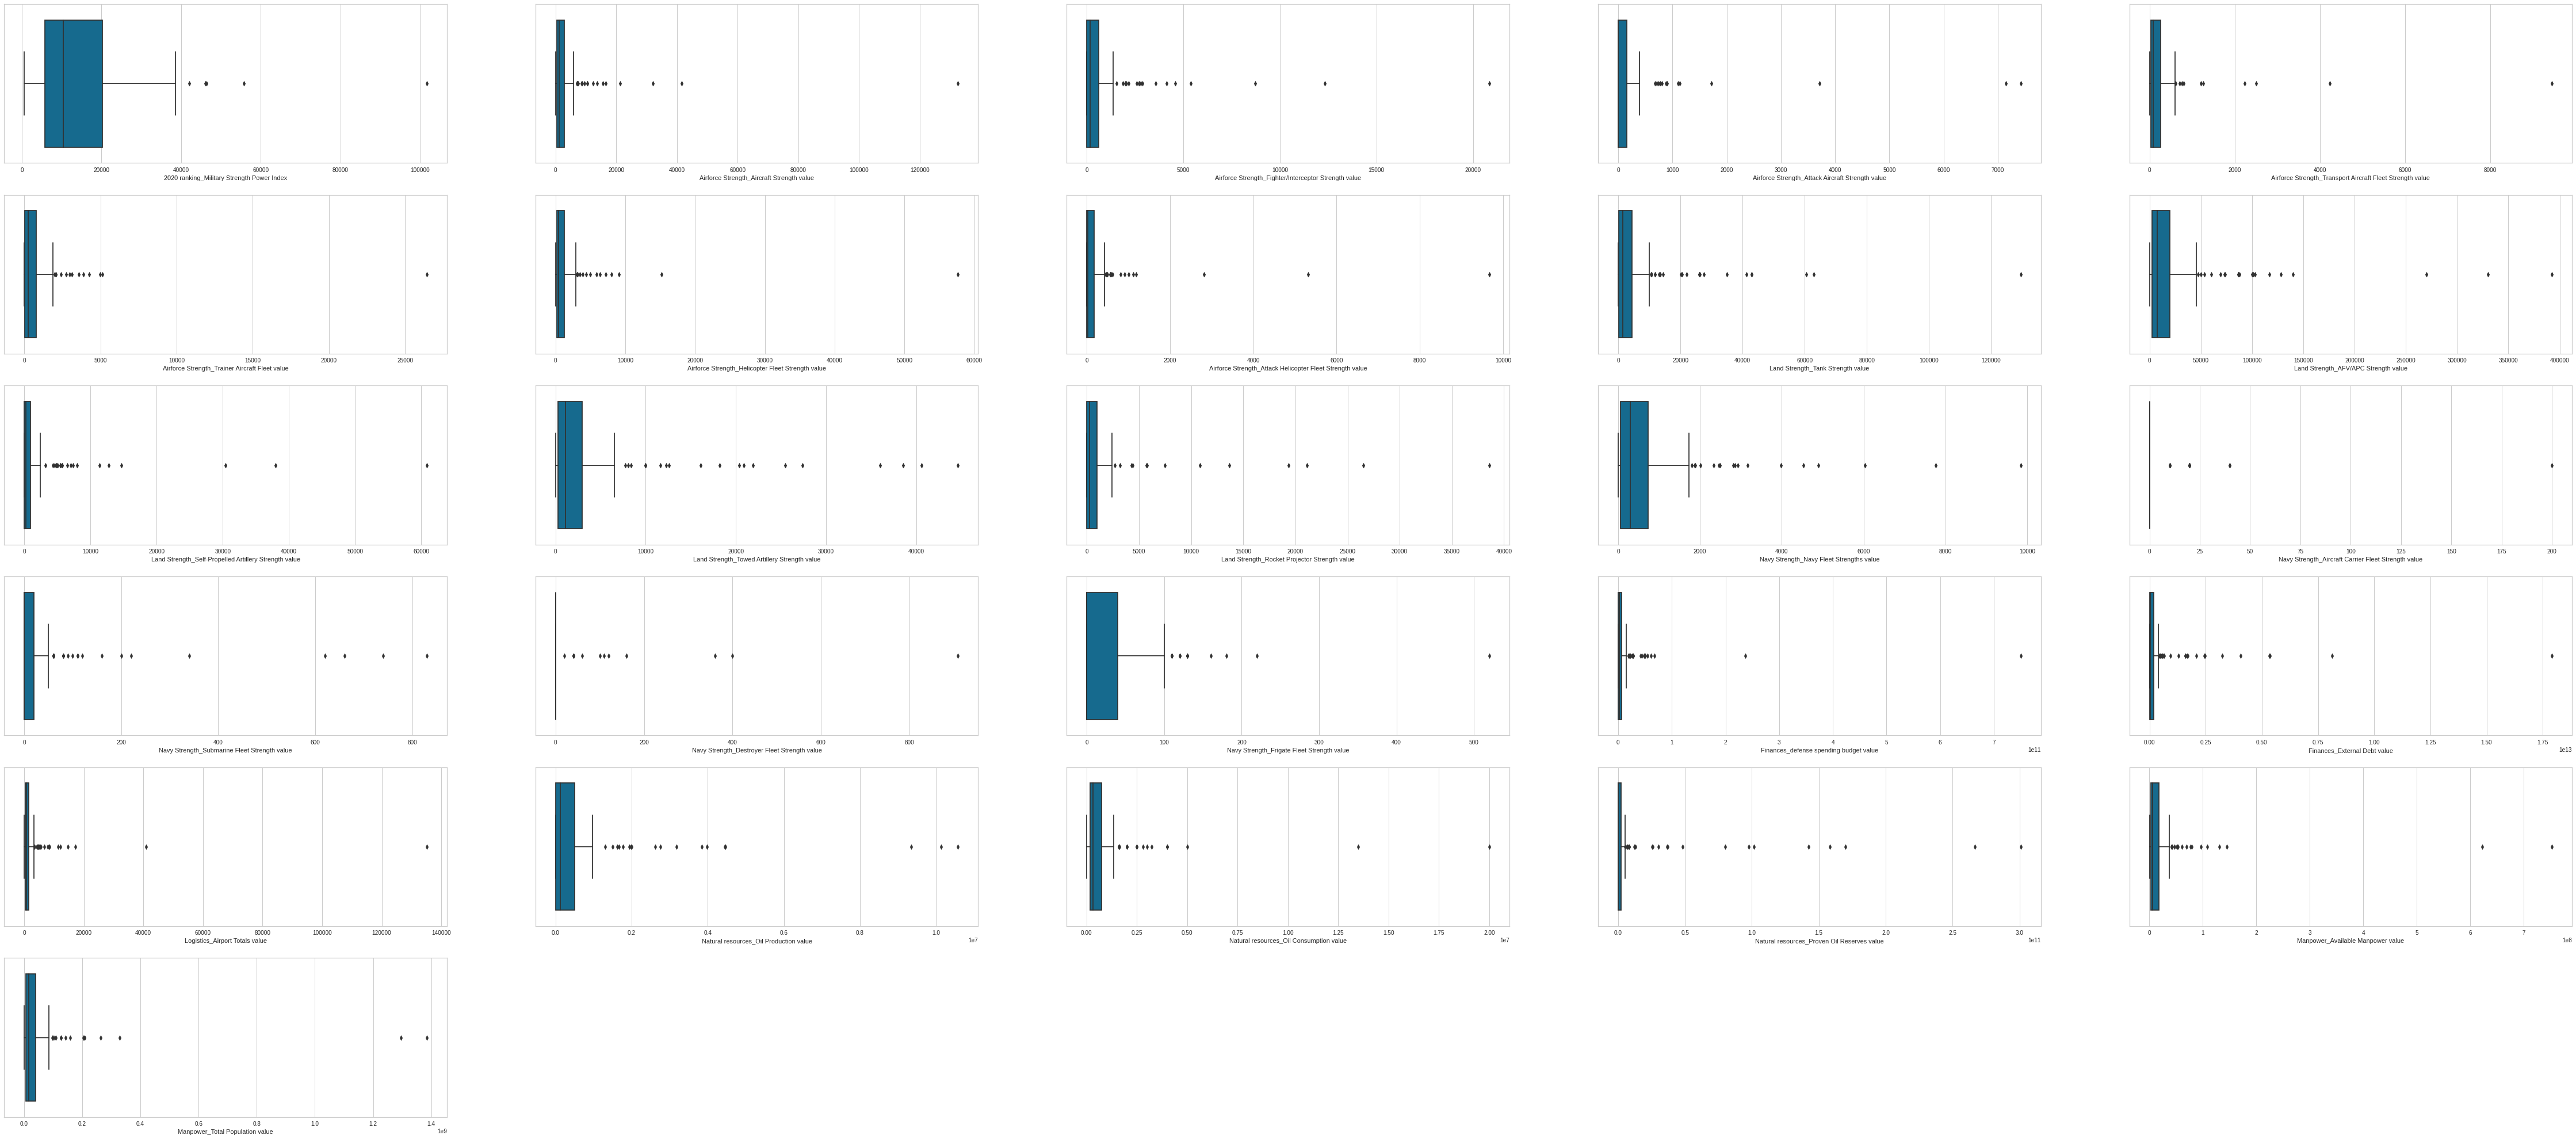

In [131]:
index = 0
plt.figure(figsize=(80,60))
for feature in df.columns:
    if feature != '2020 ranking_Country':
        index += 1
        plt.subplot(10,5,index)
        sns.boxplot(x=feature, data=df)

In [132]:
df.corr()

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
2020 ranking_Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.381789,-0.165904,-0.274310,-0.175763,-0.359353,-0.192424,-0.235734,-0.173362,-0.279904,-0.268301,-0.183438,-0.236737,-0.242678
Airforce Strength_Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.532988,0.917490,0.668296,0.910945,0.245784,0.955621,0.800685,0.884260,0.629619,0.899647,0.125047,0.385843,0.403410
Airforce Strength_Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.669301,0.798292,0.795633,0.868577,0.456029,0.892206,0.693046,0.733474,0.625634,0.916841,0.141509,0.566067,0.570915
Airforce Strength_Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.634499,0.656503,0.760027,0.733666,0.330954,0.741498,0.547148,0.663088,0.738138,0.770626,0.162843,0.459166,0.465651
Airforce Strength_Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.525189,0.870720,0.653850,0.868431,0.249392,0.912735,0.759182,0.874719,0.670480,0.874832,0.154009,0.429612,0.449885
Airforce Strength_Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.466886,0.931511,0.580384,0.882600,0.183922,0.934795,0.813180,0.899261,0.575136,0.849435,0.123859,0.297804,0.321369
Airforce Strength_Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.473208,0.936468,0.605006,0.904609,0.173110,0.958026,0.825917,0.904459,0.599123,0.875235,0.106103,0.313245,0.333446
Airforce Strength_Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.512729,0.852663,0.680367,0.878550,0.244460,0.894450,0.738504,0.812823,0.668838,0.844088,0.124168,0.319627,0.329679
Land Strength_Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.691684,0.370139,0.743171,0.448035,0.337516,0.420121,0.258375,0.346984,0.570184,0.467676,0.146265,0.363193,0.371196
Land Strength_AFV/APC Strength value,-0.361796,0.844898,0.932691,0.871821,0.818061,0.773963,0.798437,0.860358,0.778759,1.000000,0.790061,0.765663,0.751266,0.696010,0.651483,0.772614,0.731149,0.497681,0.771662,0.566182,0.591883,0.688025,0.832160,0.221302,0.553925,0.549386


## Decriptive statistics

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 ranking_Military Strength Power Index,138.0,1.460716e+04,1.324018e+04,606.0,5.748000e+03,1.034100e+04,2.021525e+04,1.016810e+05
Airforce Strength_Aircraft Strength value,138.0,3.884710e+03,1.231982e+04,0.0,3.300000e+02,1.110000e+03,2.902500e+03,1.326400e+05
Airforce Strength_Fighter/Interceptor Strength value,138.0,8.156522e+02,2.303248e+03,0.0,0.000000e+00,1.700000e+02,6.050000e+02,2.085000e+04
Airforce Strength_Attack Aircraft Strength value,138.0,2.576087e+02,9.452822e+02,0.0,0.000000e+00,0.000000e+00,1.575000e+02,7.420000e+03
Airforce Strength_Transport Aircraft Fleet Strength value,138.0,3.023188e+02,9.233044e+02,0.0,3.000000e+01,9.000000e+01,2.600000e+02,9.450000e+03
Airforce Strength_Trainer Aircraft Fleet value,138.0,8.283333e+02,2.408037e+03,0.0,4.250000e+01,2.600000e+02,7.925000e+02,2.643000e+04
Airforce Strength_Helicopter Fleet Strength value,138.0,1.540652e+03,5.201836e+03,0.0,1.525000e+02,4.400000e+02,1.267500e+03,5.768000e+04
Airforce Strength_Attack Helicopter Fleet Strength value,138.0,2.562319e+02,9.732609e+02,0.0,0.000000e+00,2.000000e+01,1.775000e+02,9.670000e+03
Land Strength_Tank Strength value,138.0,6.465652e+03,1.515464e+04,0.0,1.925000e+02,1.530000e+03,4.362500e+03,1.295000e+05
Land Strength_AFV/APC Strength value,138.0,2.485696e+04,5.410546e+04,0.0,2.502500e+03,7.345000e+03,2.000000e+04,3.925300e+05


# Data Preprocessing

In [135]:
X = df.drop('2020 ranking_Country',axis=1)

In [136]:
X.shape

(138, 26)

In [137]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

## Clustering with K-means

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

Text(0.5, 1.0, 'elbow method')

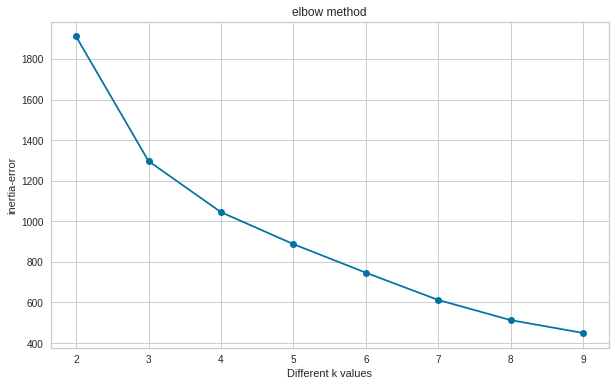

In [141]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

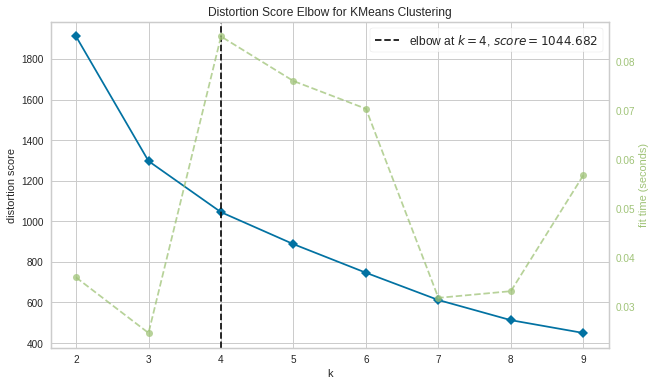

In [142]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        
visualizer.show();

### Model Building and label visualisation

In [151]:
model = KMeans(n_clusters =6, random_state=42)
model.fit_predict(X)

array([1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       0, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 5, 1, 1, 1, 5, 5, 0, 0, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 0, 5, 4, 1,
       1, 0, 5, 1, 1, 1], dtype=int32)

In [152]:
model.labels_

array([1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       0, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 5, 1, 1, 1, 5, 5, 0, 0, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 0, 5, 4, 1,
       1, 0, 5, 1, 1, 1], dtype=int32)

In [153]:
df['cluster']=model.labels_

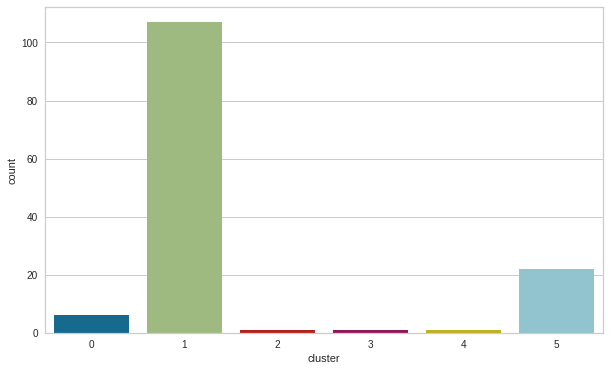

In [154]:
sns.countplot(x = df.cluster);

### Evaluate 

In [156]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.863509801272657
For n_clusters=3, the silhouette score is 0.8179627599217851
For n_clusters=4, the silhouette score is 0.48473341494906846
For n_clusters=5, the silhouette score is 0.5075047461769289
For n_clusters=6, the silhouette score is 0.5080494179809859
For n_clusters=7, the silhouette score is 0.4730271168027439
For n_clusters=8, the silhouette score is 0.4629854642721788
For n_clusters=9, the silhouette score is 0.3690353709945482
For n_clusters=10, the silhouette score is 0.27947001976202


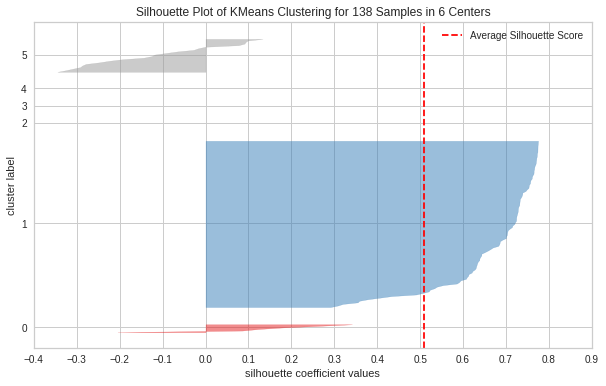

In [158]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [167]:
pd.set_option("display.max_rows", None)

In [168]:
df[["2020 ranking_Country", "cluster"]].sort_values(by="cluster")

,2020 ranking_Country,cluster
133,Venezuela,0
51,Iran,0
128,United Arab Emirates,0
52,Iraq,0
102,Saudi Arabia,0
22,Canada,0
0,Afghanistan,1
81,Nepal,1
82,Netherlands,1
83,New Zealand,1


## Hierarchical Clustering

In [159]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

### Dendogram

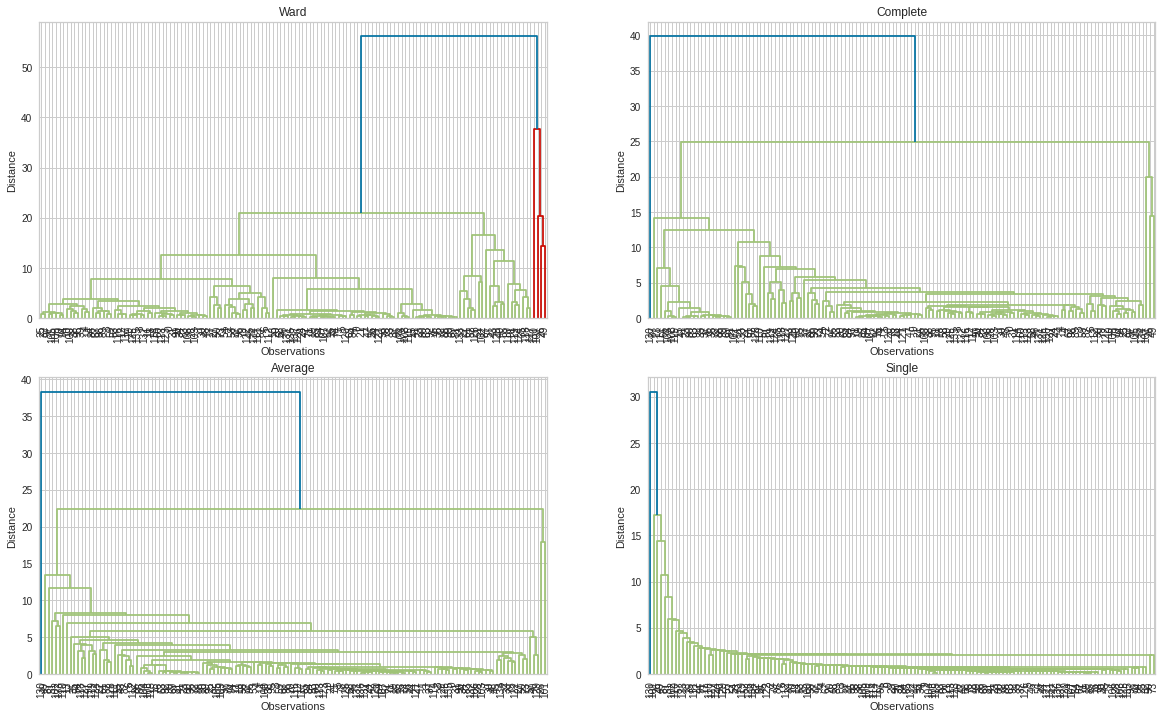

In [160]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [161]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 0, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 3, 3, 3, 3])

In [169]:
df["cluster_d"] = model1.labels_

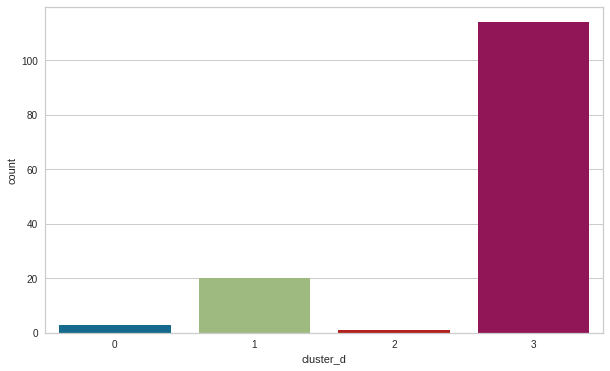

In [171]:
sns.countplot(x = df.cluster_d)

### Evaluate 

In [170]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.8456324414117866
Silhouette Score for 3 clusters: 0.8179627599217851
Silhouette Score for 4 clusters: 0.530667209152619
Silhouette Score for 5 clusters: 0.5309715650349801
Silhouette Score for 6 clusters: 0.5430628320595194
Silhouette Score for 7 clusters: 0.5426834874197954
Silhouette Score for 8 clusters: 0.5231781044968876
Silhouette Score for 9 clusters: 0.21508745432419235
